## **Marketing Analytics For E-Commerce Market Place Company**

### **Business Context**:  
The client is one of the leading online market place in India and would like partner with Analytixlabs. 
Client wants help in measuring, managing and analysing performance of business. 
 Analytixlabs has hired you as an analyst for this project where client asked you to provide data 
driven insights about business and understand customer, seller behaviors, product behavior and 
channel behavior etc..

### **Available Data**: 
Data has been provided for the period of Sep 2016 to Oct 2018 and the below is the data model. 
Tables: 
* Customers:  Customers information 
* Sellers: Sellers information 
* Products: Product information 
* Orders: Orders info like ordered, product id, status, order dates etc.. 
* Order_Items: Order level information 
* Order_Payments: Order payment information 
* Order_Review_Ratings: Customer ratings at order level 
* Geo-Location: Location details

### **Import required packages and libraries**

In [152]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# display all the columns 
pd.set_option('display.max_columns', None)

#### **Loading Data and Pre processing**

In [153]:
# customers dataframe
customer = pd.read_csv('CUSTOMERS.csv')
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh


In [154]:
# information 
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [155]:
# check for duplicates and remove 
customer.drop_duplicates(inplace=True)


In [156]:
# order items 
order_items = pd.read_csv('ORDER_ITEMS.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14


In [157]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [158]:
# shipping limit date to datetime format 
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])

# remove duplicates if any
order_items.drop_duplicates(inplace=True)

In [159]:
# order_payments 
order_payments = pd.read_csv('ORDER_PAYMENTS.csv')
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [160]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [161]:
# drop duplicates
order_payments.drop_duplicates(inplace=True)

In [162]:
# orders 
orders = pd.read_csv('ORDERS.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00


In [163]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [164]:
# change data types to date time 
date_time = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in date_time:
    orders[col] = pd.to_datetime(orders[col])

In [165]:
# remove duplicates and null missing values 
orders.drop_duplicates(inplace=True)
orders.dropna(inplace=True)

In [166]:
# order reviews and ratings 
order_ratings = pd.read_csv('ORDER_REVIEW_RATINGS.csv')
order_ratings.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,3/1/2018 0:00,3/2/2018 10:26


In [167]:
order_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_creation_date     100000 non-null  object
 4   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [168]:
# change data type as date time 
order_ratings['review_creation_date'] = pd.to_datetime(order_ratings['review_creation_date'])
order_ratings['review_answer_timestamp'] = pd.to_datetime(order_ratings['review_answer_timestamp'])

# remove duplicates 
order_ratings.drop_duplicates(inplace=True)

In [169]:
#products 
products = pd.read_csv('PRODUCTS.csv')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [170]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [171]:
#drop duplicates and missing values 
products.drop_duplicates(inplace=True)
products.dropna(inplace=True)

In [172]:
# sellers 
sellers = pd.read_csv('SELLERS.csv')
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Akkarampalle,Andhra Pradesh
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Koratla,Andhra Pradesh


In [173]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3038 non-null   object
 3   seller_state            3038 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [174]:
# drop duplicates and missing values 
sellers.drop_duplicates(inplace=True)
sellers.dropna(inplace=True)

In [175]:
# geo location
geo_location = pd.read_csv('GEO_LOCATION.csv')
geo_location.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh
3,1035,-23.541578,-46.641607,Akkarampalle,Andhra Pradesh
4,1012,-23.547762,-46.635361,Akkarampalle,Andhra Pradesh


In [176]:
# drop duplicates and missing values 
geo_location.drop_duplicates(inplace=True)
geo_location.dropna(inplace=True)

## **Exploratory Data Analysis**

In [177]:
# join the dataframes for analysis
customer_orders = pd.merge(customer, orders, on='customer_id', how='inner')

### 1.a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…)

In [178]:
# sum up the pyment values to find total revenue
Total_Revenue = order_payments['payment_value'].sum()
print('Total Revenue : Rs',Total_Revenue )
print('--------')
# calculate the total number of order itmems to calculate total quantity
Total_Quantity = order_items['order_id'].count()
print('Total order quantity : ', Total_Quantity)
print('--------')
# number of unique product category names
Total_Categories = products['product_category_name'].nunique()
print('Total product categories : ', Total_Categories)
print('--------')
# number of  unique seller_id 
Total_Sellers = sellers['seller_id'].nunique()
print('Total number of sellers : ', Total_Sellers)
print('--------')
# number of zip codes to determine total number of locations 
Total_locations = geo_location['geolocation_zip_code_prefix'].nunique()
print('Total number of locations : ', Total_locations)
print('--------')
# unique payment types
Total_payment_methods =  order_payments['payment_type'].nunique()
print('Total payment methods : ', Total_payment_methods)
print('--------')


Total Revenue : Rs 16008872.12
--------
Total order quantity :  112650
--------
Total product categories :  71
--------
Total number of sellers :  3038
--------
Total number of locations :  19015
--------
Total payment methods :  5
--------


### 1.b. Understanding how many new customers acquired every month

In [179]:
#create "Purchase month" column in orders data frame
customer_orders['Order_Month'] = customer_orders['order_purchase_timestamp'].dt.to_period('M')
# count new customers every month 
new_customers_per_month =customer_orders.groupby(['Order_Month'])['customer_id'].nunique().reset_index()

#rename column name
new_customers_per_month.rename(columns={'customer_id': 'New_Customers'}, inplace=True)

### 1. c. Understand the retention of customers on month on month basis

In [180]:
# group orders by Order month and count unique customers 
retention = customer_orders.groupby('Order_Month')['customer_unique_id'].nunique().reset_index()
retention.rename(columns={'customer_unique_id': 'customer_count'}, inplace=True)
# calculate retention for each month
retention['retained'] = retention['customer_count'] - retention['customer_count'].shift(1)
# calculate retention rate 
retention['retention_rate'] = (retention['customer_count'] / retention['customer_count'].shift(1)) * 100
# set retention rate for first month as '0'
retention.replace(np.nan, 0, inplace=True)
retention

,Order_Month,customer_count,retained,retention_rate
0,2016-09,1,0.0,0.000000
1,2016-10,267,266.0,26700.000000
2,2016-12,1,-266.0,0.374532
3,2017-01,716,715.0,71600.000000
4,2017-02,1618,902.0,225.977654
5,2017-03,2508,890.0,155.006180
6,2017-04,2274,-234.0,90.669856
7,2017-05,3478,1204.0,152.946350
8,2017-06,3076,-402.0,88.441633
9,2017-07,3802,726.0,123.602081


In [181]:
retention['Order_Month'] = pd.to_datetime(retention['Order_Month'].dt.to_timestamp())

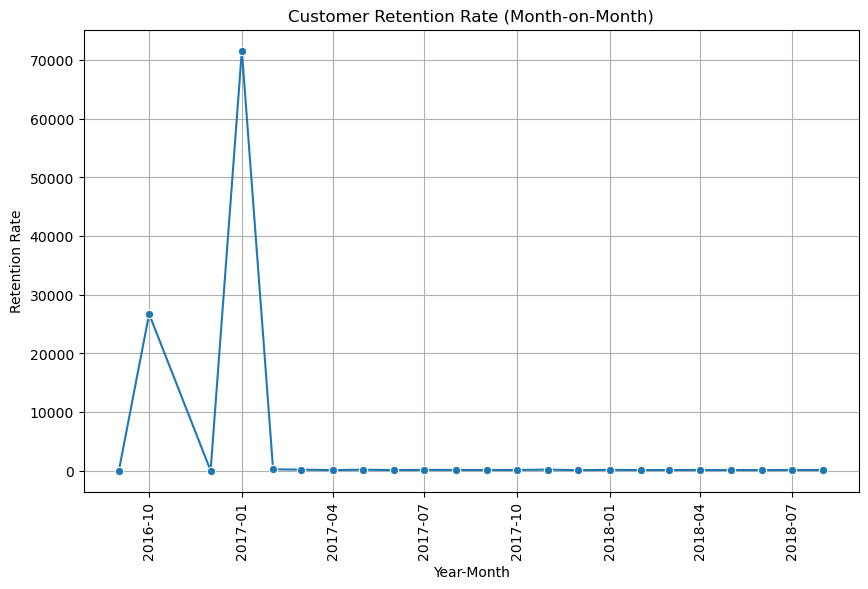

In [182]:
# Plot the retention rate
plt.figure(figsize=(10, 6))
sns.lineplot(data=retention, x='Order_Month', y='retention_rate', marker='o')
plt.title('Customer Retention Rate (Month-on-Month)')
plt.xlabel('Year-Month')
plt.xticks(rotation=90)
plt.ylabel('Retention Rate')
plt.grid(True)
plt.show()

### 1.d. How the revenues from existing/new customers on month on month basis 

In [183]:
# join customer_orders  and order_items dataframes 
customer_orders = pd.merge(customer_orders, order_items, on='order_id')
customer_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Order_Month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,2017-05-16 15:22:00,2017-05-23 10:47:00,2017-05-25 10:35:00,2017-06-05,2017-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:00,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,2018-01-12 20:58:00,2018-01-15 17:14:00,2018-01-29 12:41:00,2018-02-06,2018-01,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:00,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,2018-05-20 16:19:00,2018-06-11 14:31:00,2018-06-14 17:58:00,2018-06-13,2018-05,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:00,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,2018-03-13 17:29:00,2018-03-27 23:22:00,2018-03-28 16:04:00,2018-04-10,2018-03,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:00,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,2018-07-29 10:10:00,2018-07-30 15:16:00,2018-08-09 20:55:00,2018-08-15,2018-07,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:00,230.00,22.25


In [184]:
# calculate total value by adding price and freight value (shipping cost)
customer_orders['total_price'] = customer_orders['price'] + customer_orders['freight_value']
customer_orders['Order_Month']= pd.to_datetime(customer_orders['Order_Month'].dt.to_timestamp())

In [185]:
# first purchase date for each customers 
first_purchase = customer_orders.groupby('customer_id')['order_purchase_timestamp'].min().reset_index()
first_purchase.rename(columns={'order_purchase_timestamp':'first_purchase_date'}, inplace=True)

# merge with customer orders to indentify new/existing customers
customer_orders = pd.merge(customer_orders, first_purchase, on='customer_id')
customer_orders['customer_type'] = 'Existing'
customer_orders.loc[customer_orders['order_purchase_timestamp']==customer_orders['first_purchase_date'], 'customer_type'] = 'New'


In [186]:
#calculate revenues by grouping and aggregating data 
revenue = customer_orders.groupby(['Order_Month','customer_type'])['total_price'].sum().reset_index()
revenue 


,Order_Month,customer_type,total_price
0,2016-09-01,New,143.46
1,2016-10-01,New,47195.15
2,2016-12-01,New,19.62
3,2017-01-01,New,127367.44
4,2017-02-01,New,269399.65
5,2017-03-01,New,414330.95
6,2017-04-01,New,390812.40
7,2017-05-01,New,566657.40
8,2017-06-01,New,490050.37
9,2017-07-01,New,566299.08


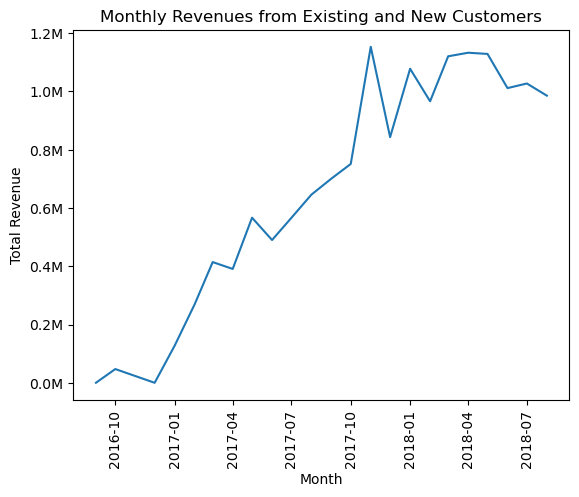

In [187]:
# plot 
sns.lineplot(data=revenue, x='Order_Month', y='total_price', markers=True)
plt.title('Monthly Revenues from Existing and New Customers')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1f}M'.format(y/1e6)))
plt.show()

### 1.e Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method.

In [188]:
customer_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Order_Month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price,first_purchase_date,customer_type
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,2017-05-16 15:22:00,2017-05-23 10:47:00,2017-05-25 10:35:00,2017-06-05,2017-05-01,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:00,124.99,21.88,146.87,2017-05-16 15:05:00,New
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,2018-01-12 20:58:00,2018-01-15 17:14:00,2018-01-29 12:41:00,2018-02-06,2018-01-01,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:00,289.00,46.48,335.48,2018-01-12 20:48:00,New
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,2018-05-20 16:19:00,2018-06-11 14:31:00,2018-06-14 17:58:00,2018-06-13,2018-05-01,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:00,139.94,17.79,157.73,2018-05-19 16:07:00,New
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,2018-03-13 17:29:00,2018-03-27 23:22:00,2018-03-28 16:04:00,2018-04-10,2018-03-01,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:00,149.94,23.36,173.30,2018-03-13 16:06:00,New
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,2018-07-29 10:10:00,2018-07-30 15:16:00,2018-08-09 20:55:00,2018-08-15,2018-07-01,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:00,230.00,22.25,252.25,2018-07-29 09:51:00,New


In [189]:
customer_orders['order_week'] = customer_orders['order_purchase_timestamp'].dt.isocalendar().week
customer_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Order_Month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price,first_purchase_date,customer_type,order_week
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,2017-05-16 15:22:00,2017-05-23 10:47:00,2017-05-25 10:35:00,2017-06-05,2017-05-01,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:00,124.99,21.88,146.87,2017-05-16 15:05:00,New,20
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,2018-01-12 20:58:00,2018-01-15 17:14:00,2018-01-29 12:41:00,2018-02-06,2018-01-01,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:00,289.00,46.48,335.48,2018-01-12 20:48:00,New,2
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,2018-05-20 16:19:00,2018-06-11 14:31:00,2018-06-14 17:58:00,2018-06-13,2018-05-01,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:00,139.94,17.79,157.73,2018-05-19 16:07:00,New,20
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,2018-03-13 17:29:00,2018-03-27 23:22:00,2018-03-28 16:04:00,2018-04-10,2018-03-01,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:00,149.94,23.36,173.30,2018-03-13 16:06:00,New,11
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,2018-07-29 10:10:00,2018-07-30 15:16:00,2018-08-09 20:55:00,2018-08-15,2018-07-01,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:00,230.00,22.25,252.25,2018-07-29 09:51:00,New,30


#### **Trends and Seasonality of sales by Month**

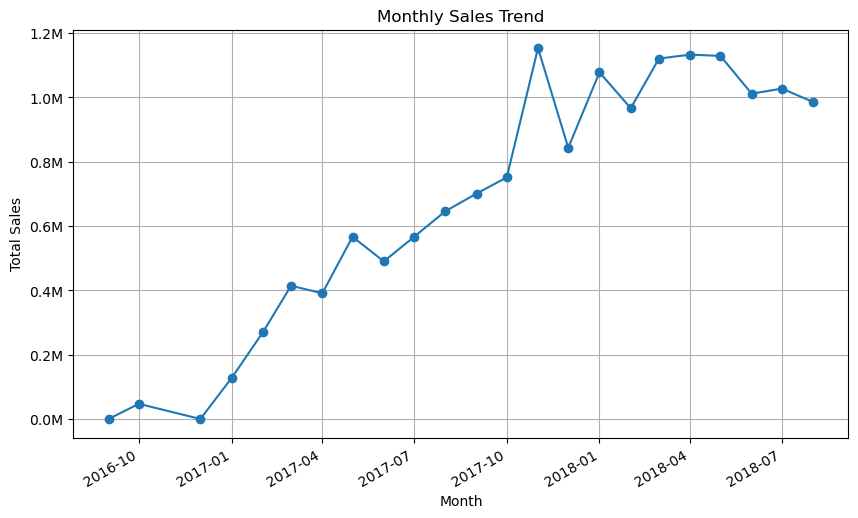

In [190]:
monthly_sales = customer_orders.groupby('Order_Month')['total_price'].sum()

# Plot the monthly sales trend
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1f}M'.format(y/1e6)))
plt.grid(True)
plt.show()

#### **Quantity by Category :**

In [191]:
# merge product dataframe 
customer_orders_products = pd.merge(customer_orders, products, on='product_id', how='inner')
# drop redundant columns 
customer_orders_products.drop(columns=['product_name_lenght','product_description_lenght', 
                                      'product_photos_qty', 'product_weight_g',
                                      'product_length_cm', 'product_height_cm', 'product_width_cm'], axis=1, inplace=True) 


In [192]:
# Group by month and category, sum the quantity sold
quantity_by_category =  customer_orders_products.groupby(['product_category_name'])[['order_item_id']].count().reset_index()
quantity_by_category.rename(columns={'order_item_id': 'order_quantity'}, inplace=True)

In [193]:
# rename product category name as 'Others' if product 'order_qunatity' is less than 200 
quantity_by_category.loc[quantity_by_category['order_quantity'] < 199, 'product_category_name'] = 'Others'

In [194]:
pd.set_option('display.max_rows', None)
quantity_by_category.sort_values(by='order_quantity', ascending=False, inplace=True)

In [195]:
quantity_by_category = quantity_by_category.groupby('product_category_name')['order_quantity'].sum().reset_index()
quantity_by_category.sort_values(by = 'order_quantity', ascending=False, inplace=True )
quantity_by_category

,product_category_name,order_quantity
5,Bed_Bath_Table,10952
25,Health_Beauty,9467
41,Sports_Leisure,8429
22,Furniture_Decor,8156
9,Computers_Accessories,7643
30,Housewares,6795
45,Watches_Gifts,5857
43,Telephony,4428
24,Garden_Tools,4267
3,Auto,4139


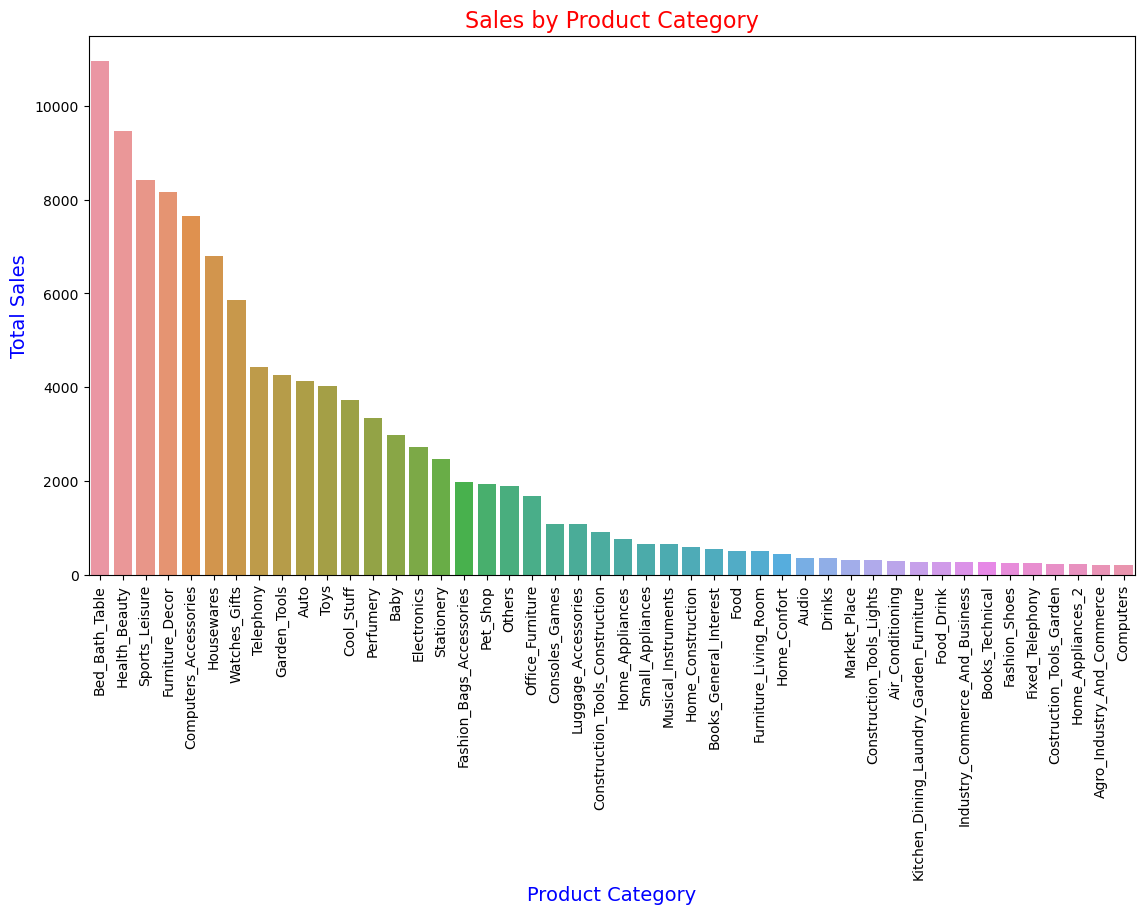

In [196]:
# plot 
plt.figure(figsize=(13.5, 7))
sns.barplot(data=quantity_by_category, 
            x='product_category_name', 
            y='order_quantity',
            errorbar=None)
#plt.bar(quantity_by_category['product_category_name'], quantity_by_category['order_quantity'])
plt.xlabel('Product Category', fontsize=14, color='blue')
plt.ylabel('Total Sales', fontsize=14, color='blue' )
plt.title('Sales by Product Category', fontsize=16, color='red')
plt.xticks(rotation=90)
plt.show()

#### **Sales by Category :**

In [197]:
# group by product category and sum the total price
category_sales = customer_orders_products.groupby('product_category_name')['total_price'].sum().reset_index()
# sort the values in ascending order
category_sales = category_sales.sort_values(by='total_price', ascending= False)

In [198]:
# since there are many categories. replace total price below 25th percentile as 'others' category
percentile_25 = category_sales['total_price'].quantile(0.25)
category_sales.loc[category_sales['total_price'] < percentile_25, 'product_category_name'] = 'Others'
category_sales = category_sales.groupby('product_category_name')['total_price'].sum().reset_index()
category_sales.sort_values(by='total_price', ascending=False, inplace=True )
category_sales

,product_category_name,total_price
31,Health_Beauty,1412213.46
53,Watches_Gifts,1264016.98
6,Bed_Bath_Table,1225052.07
49,Sports_Leisure,1118004.06
11,Computers_Accessories,1032603.65
28,Furniture_Decor,879835.03
36,Housewares,758392.25
16,Cool_Stuff,691371.51
4,Auto,669319.92
30,Garden_Tools,566991.45


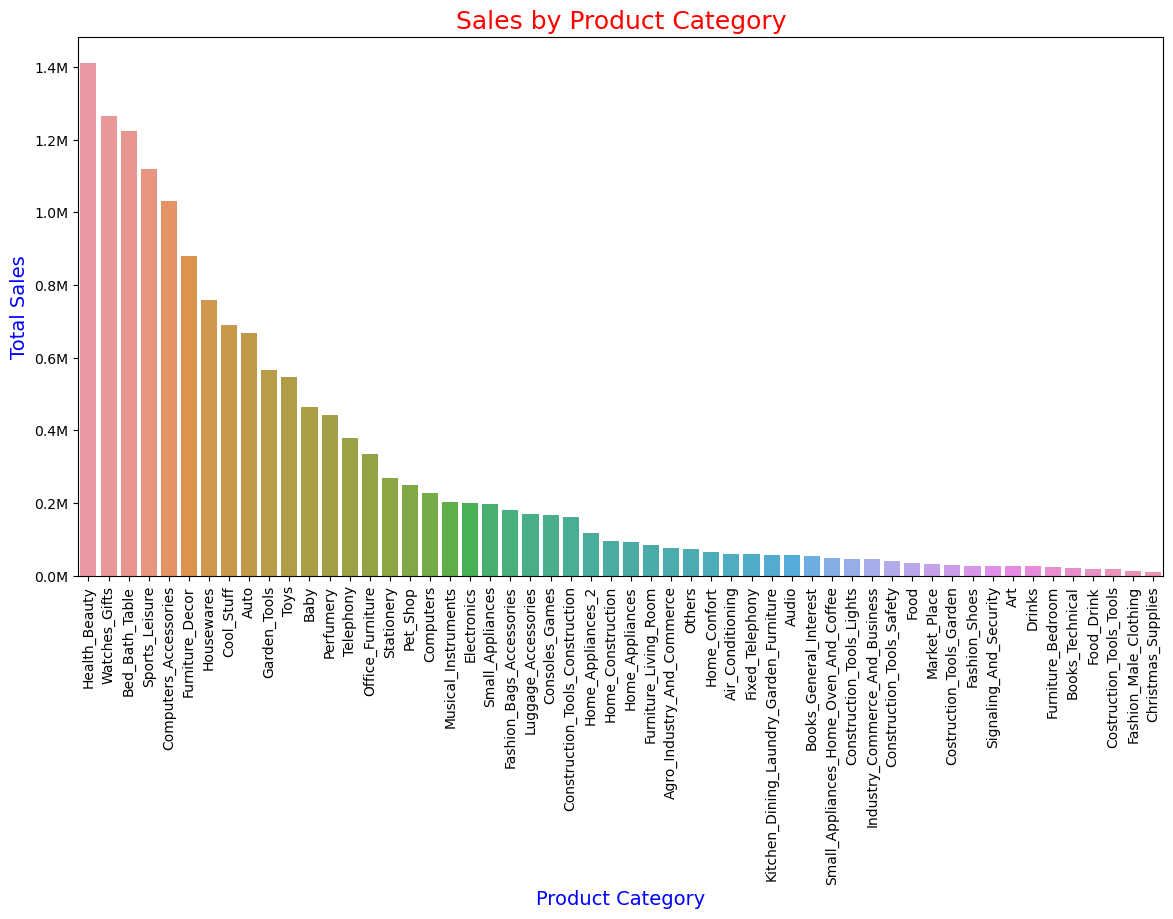

In [199]:
# plot the bar graph 
plt.figure(figsize=(14, 7))
sns.barplot(data=category_sales,
            x='product_category_name',
            y='total_price',
            )
plt.xlabel('Product Category', fontsize=14, color='blue')
plt.ylabel('Total Sales', fontsize=14, color='blue')
plt.title('Sales by Product Category', fontsize=18, color='red')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1f}M'.format(y/1e6)))
plt.xticks(rotation=90)
plt.show()

#### **Sales by State :**

In [200]:
# group sales amount by state and arrange it in descending order
sales_by_state  = customer_orders.groupby(['customer_state'])['total_price'].sum().reset_index().sort_values(by='total_price', ascending=False)
sales_by_state

,customer_state,total_price
0,Andhra Pradesh,9056005.69
5,Gujarat,1210771.09
2,Chhattisgarh,1050472.31
9,Karnataka,607943.24
3,Delhi,562375.38
11,Madhya Pradesh,480605.35
16,Tamil Nadu,359747.01
6,Haryana,345044.43
12,Maharashtra,326798.79
8,Jammu & Kashmir,245103.40


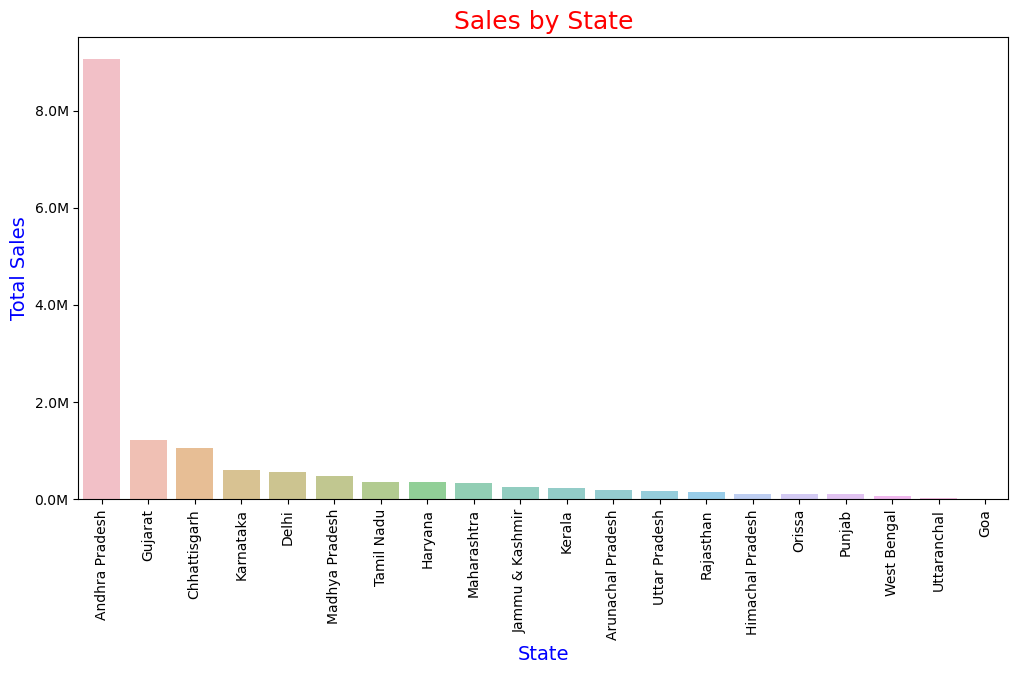

In [201]:
# plot bar graph 
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_state,
            x='customer_state',
            y='total_price',
            alpha=0.6)
plt.xlabel('State', fontsize=14, color='blue')
plt.ylabel('Total Sales',fontsize=14, color='blue')
plt.title('Sales by State', fontsize=18, color='red')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1f}M'.format(y/1e6)))
plt.xticks(rotation=90)
plt.show()

#### **Sales by day of the week :** 

In [202]:
# create a 'day_of_week' column and map it to day_names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

customer_orders['day_of_week'] = customer_orders['order_purchase_timestamp'].dt.dayofweek
customer_orders['day_of_week'] = customer_orders['day_of_week'].map(lambda x : day_names[x])
customer_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Order_Month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price,first_purchase_date,customer_type,order_week,day_of_week
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,2017-05-16 15:22:00,2017-05-23 10:47:00,2017-05-25 10:35:00,2017-06-05,2017-05-01,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:00,124.99,21.88,146.87,2017-05-16 15:05:00,New,20,Tuesday
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,2018-01-12 20:58:00,2018-01-15 17:14:00,2018-01-29 12:41:00,2018-02-06,2018-01-01,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:00,289.00,46.48,335.48,2018-01-12 20:48:00,New,2,Friday
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,2018-05-20 16:19:00,2018-06-11 14:31:00,2018-06-14 17:58:00,2018-06-13,2018-05-01,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:00,139.94,17.79,157.73,2018-05-19 16:07:00,New,20,Saturday
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,2018-03-13 17:29:00,2018-03-27 23:22:00,2018-03-28 16:04:00,2018-04-10,2018-03-01,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:00,149.94,23.36,173.30,2018-03-13 16:06:00,New,11,Tuesday
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,2018-07-29 10:10:00,2018-07-30 15:16:00,2018-08-09 20:55:00,2018-08-15,2018-07-01,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:00,230.00,22.25,252.25,2018-07-29 09:51:00,New,30,Sunday


In [203]:
# group sales by day_of_the week and sort in descending order
sales_by_day = customer_orders.groupby('day_of_week')['total_price'].sum().reset_index().sort_values(by='total_price', ascending=False)
sales_by_day


,day_of_week,total_price
1,Monday,2530173.73
5,Tuesday,2473553.80
6,Wednesday,2395846.33
4,Thursday,2283562.10
0,Friday,2221985.80
3,Sunday,1807228.21
2,Saturday,1704644.86


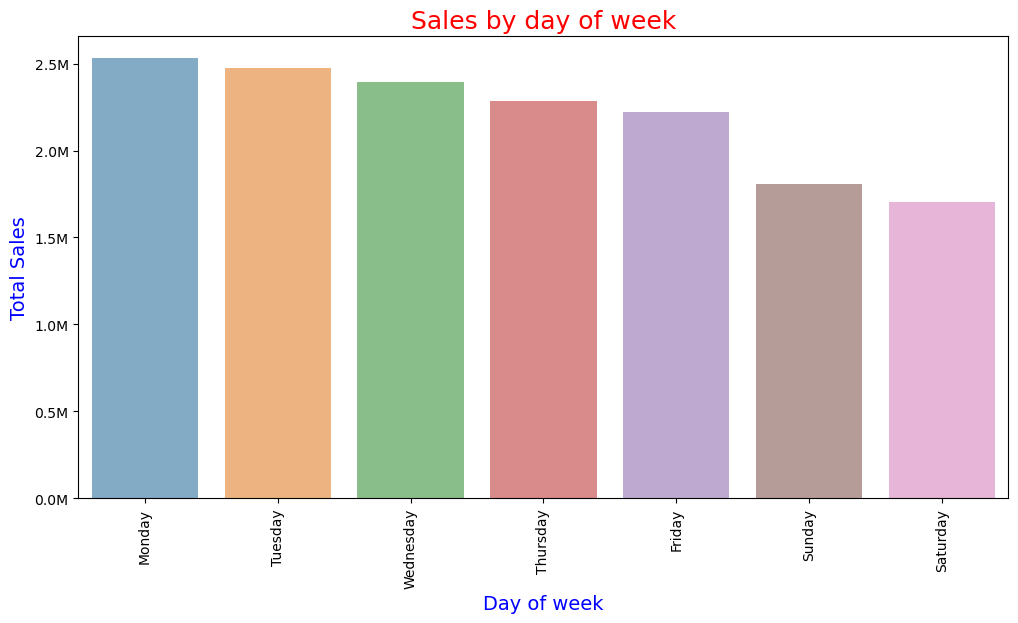

In [204]:
# plot the bar graph 
plt.figure(figsize=(12,6))
sns.barplot(data=sales_by_day,
            x ='day_of_week',
            y ='total_price',
            alpha=0.6)
plt.xlabel('Day of week', fontsize=14, color='blue')
plt.ylabel('Total Sales',fontsize=14, color='blue')
plt.title('Sales by day of week', fontsize=18, color='red')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1f}M'.format(y/1e6)))
plt.xticks(rotation=90)
plt.show()

#### **Sales by Hour:**

In [205]:
# create a new column 'purchase_hour' 
customer_orders['purchase_hour'] = customer_orders['order_purchase_timestamp'].dt.hour
customer_orders['purchase_hour'].nunique()

24

In [206]:
# group sales amount by purchase hour and sort it in descending order
sales_by_hour = customer_orders.groupby(['purchase_hour'])['total_price'].sum().reset_index().sort_values(by='total_price', ascending=False)
sales_by_hour

,purchase_hour,total_price
14,14,1075026.89
16,16,1059096.94
15,15,1026232.97
11,11,996262.99
13,13,988659.53
20,20,968132.63
10,10,950834.31
12,12,949607.36
17,17,948807.92
21,21,945640.20


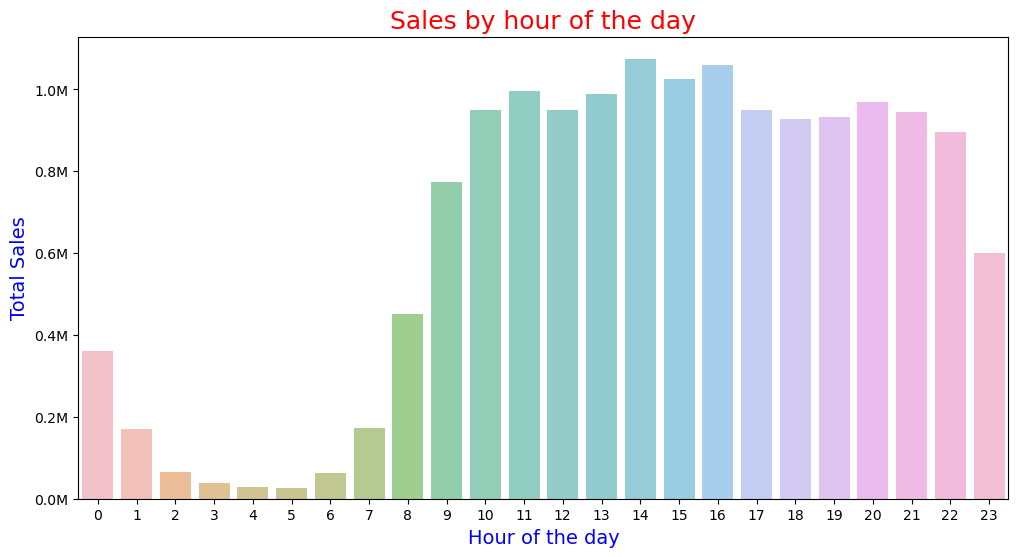

In [207]:
# plot a bargraph 
plt.figure(figsize=(12,6))
sns.barplot(data=sales_by_hour,
            x ='purchase_hour',
            y ='total_price',
            alpha=0.6)
plt.xlabel('Hour of the day', fontsize=14, color='blue')
plt.ylabel('Total Sales',fontsize=14, color='blue')
plt.title('Sales by hour of the day', fontsize=18, color='red')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1f}M'.format(y/1e6)))
plt.show()

#### **Sales by Payment method:**

In [208]:
# join order_payments data frame
customer_orders_payments = pd.merge(customer_orders, order_payments, on='order_id', how='inner')
# group by payment_type and add 'total_price' , sort the total price
sales_by_payment_type = customer_orders_payments.groupby('payment_type')['total_price'].sum().reset_index().sort_values(by='total_price', ascending=False)

# display the dataframe
sales_by_payment_type

,payment_type,total_price
1,credit_card,12380781.42
0,UPI,2767978.11
3,voucher,754212.72
2,debit_card,208267.89


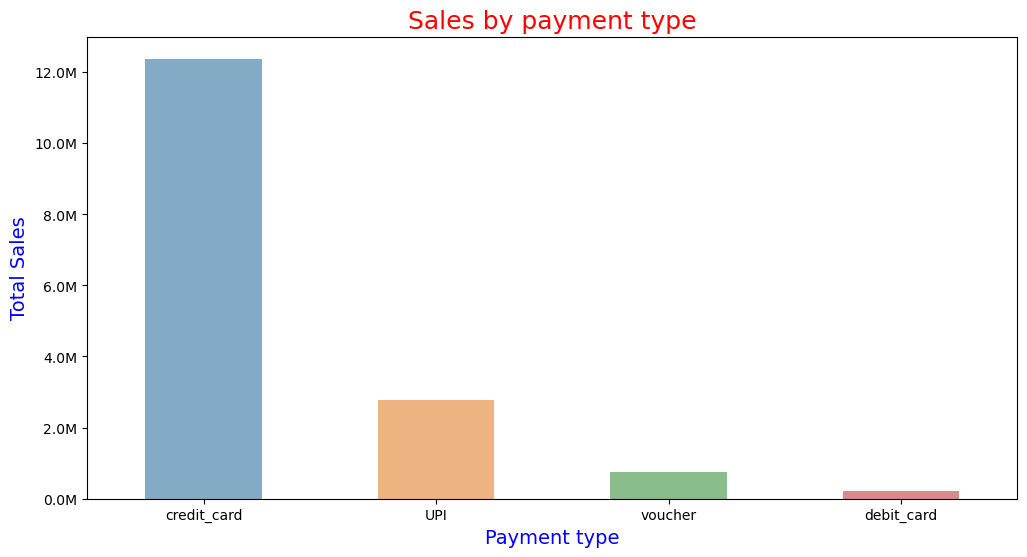

In [209]:
# plot bargraph
# plot a bargraph 
plt.figure(figsize=(12,6))
sns.barplot(data=sales_by_payment_type,
            x ='payment_type',
            y ='total_price',
            alpha=0.6, width=0.5)
plt.xlabel('Payment type', fontsize=14, color='blue')
plt.ylabel('Total Sales',fontsize=14, color='blue')
plt.title('Sales by payment type', fontsize=18, color='red')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1f}M'.format(y/1e6)))
plt.show()

In [210]:
customer_orders_products.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'Order_Month', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'total_price', 'first_purchase_date', 'customer_type',
       'order_week', 'product_category_name'],
      dtype='object')

#### **1.g. Popular categories by Month and state**

##### **Popular Products by Month**

In [211]:
# Group by Month and Product Category, then count the occurrences of each product
popular_by_month = customer_orders_products.groupby(['Order_Month', 'product_category_name'])['order_id'].count().reset_index()
# Find the most popular product in each month
popular_by_month = popular_by_month.loc[popular_by_month.groupby('Order_Month')['order_id'].idxmax()]
popular_by_month.rename(columns={'order_id':'quantity_sold'}, inplace=True)
popular_by_month['Order_Month'] = popular_by_month['Order_Month'].dt.strftime('%Y-%B')
#display the result
popular_by_month.reset_index(drop=True)

,Order_Month,product_category_name,quantity_sold
0,2016-September,Health_Beauty,3
1,2016-October,Furniture_Decor,65
2,2016-December,Fashion_Bags_Accessories,1
3,2017-January,Furniture_Decor,176
4,2017-February,Furniture_Decor,255
5,2017-March,Furniture_Decor,315
6,2017-April,Bed_Bath_Table,271
7,2017-May,Bed_Bath_Table,361
8,2017-June,Bed_Bath_Table,369
9,2017-July,Bed_Bath_Table,569


##### **Popular Products by state :**

In [212]:
popular_by_state = customer_orders_products.groupby(['customer_state', 'product_category_name'])['order_id'].count().reset_index()
# Find the most popular product in each month
popular_by_state = popular_by_state.loc[popular_by_state.groupby('customer_state')['order_id'].idxmax()]
popular_by_state.rename(columns={'order_id':'quantity_sold'}, inplace=True)

#display the result
popular_by_state.reset_index(drop=True)

,customer_state,product_category_name,quantity_sold
0,Andhra Pradesh,Bed_Bath_Table,6977
1,Arunachal Pradesh,Bed_Bath_Table,114
2,Chhattisgarh,Bed_Bath_Table,677
3,Delhi,Health_Beauty,324
4,Goa,Auto,1
5,Gujarat,Bed_Bath_Table,775
6,Haryana,Bed_Bath_Table,278
7,Himachal Pradesh,Bed_Bath_Table,82
8,Jammu & Kashmir,Bed_Bath_Table,159
9,Karnataka,Bed_Bath_Table,376


#### **1.h. List top 10 most expensive products sorted by price**

In [213]:
# sort values of price for product_id in descending order and select first 10 rows. 
top_10_expensive = customer_orders_products[['product_id', 'product_category_name', 'price']].sort_values(by='price', ascending=False)[:10]

# display the result
top_10_expensive.reset_index(drop=True)

,product_id,product_category_name,price
0,489ae2aa008f021502940f251d4cce7f,Housewares,6735.00
1,69c590f7ffc7bf8db97190b6cb6ed62e,Computers,6729.00
2,1bdf5e6731585cf01aa8169c7028d6ad,Art,6499.00
3,a6492cc69376c469ab6f61d8f44de961,Small_Appliances,4799.00
4,c3ed642d592594bb648ff4a04cee2747,Small_Appliances,4690.00
5,259037a6a41845e455183f89c5035f18,Computers,4590.00
6,a1beef8f3992dbd4cd8726796aa69c53,Musical_Instruments,4399.87
7,6cdf8fc1d741c76586d8b6b15e9eef30,Consoles_Games,4099.99
8,dd113cb02b2af9c8e5787e8f1f0722f6,Sports_Leisure,4059.00
9,6902c1962dd19d540807d0ab8fade5c6,Watches_Gifts,3999.90


----------------------------

### **2. Performing Customers/sellers Segmentation**

#### **a. Divide the customers into groups based on the revenue generated** 

In [214]:
# create customer groups based on revenue generated
num_groups = 5
group_labels = ['very_low', 'low', 'medium', 'high', 'very_high']

# Create groups based on 'total_revenue' using quantiles
customer_orders['revenue_group'] = pd.qcut(customer_orders['total_price'], q=num_groups, labels=group_labels)

# display the result for first 5 rows
customer_orders[['customer_unique_id', 'total_price', 'revenue_group']].head()

,customer_unique_id,total_price,revenue_group
0,861eff4711a542e4b93843c6dd7febb0,146.87,high
1,290c77bc529b7ac935b93aa66c333dc3,335.48,very_high
2,060e732b5b29e8181a18229c7b0b2b5e,157.73,high
3,259dac757896d24d7702b9acbbff3f3c,173.30,high
4,345ecd01c38d18a9036ed96c73b8d066,252.25,very_high


In [215]:
# group by revenue group and sum up the revenue
customer_revenue = customer_orders.groupby('revenue_group')['total_price'].sum().reset_index().sort_values(by='total_price', ascending=False)


# display the result 
customer_revenue.reset_index(drop=True)

,revenue_group,total_price
0,very_high,8097573.96
1,high,3119395.58
2,medium,2042672.44
3,low,1364977.65
4,very_low,792375.20


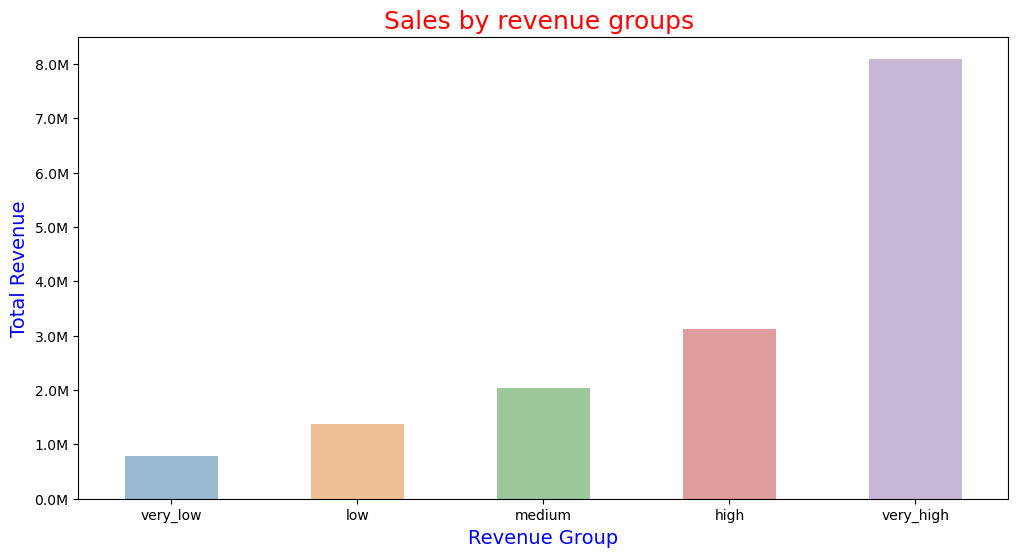

In [216]:
# plot the graph
plt.figure(figsize=(12,6))
sns.barplot(data=customer_revenue,
            x ='revenue_group',
            y ='total_price',
            alpha=0.5, width=0.5)
plt.xlabel('Revenue Group', fontsize=14, color='blue')
plt.ylabel('Total Revenue',fontsize=14, color='blue')
plt.title('Sales by revenue groups ', fontsize=18, color='red')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1f}M'.format(y/1e6)))
plt.show()

#### **b. Divide the sellers into groups based on the revenue generated** 

In [217]:
# create seller groups based on revenue generated
num_groups = 5
group_labels = ['very_low', 'low', 'medium', 'high', 'very_high']

# Create groups based on 'total_revenue' using quantiles
customer_orders['revenue_group'] = pd.qcut(customer_orders['total_price'], q=num_groups, labels=group_labels)

# display the top 10 sellers with high revenue
customer_orders[['seller_id', 'total_price', 'revenue_group']].groupby(['seller_id','revenue_group'])['total_price'].sum().reset_index().sort_values(by='total_price', ascending=False)[:10]


,seller_id,revenue_group,total_price
4914,53243585a1d6dc2643021fd1853d8905,very_high,229749.06
14519,fa1c13f2614d7b5c4749cbc52fecda94,very_high,183173.34
4174,4869f7a5dfa277a7dca6462dcf3b52b2,very_high,179148.96
7524,7e93a43ef30c4f03f38b393420bc753a,very_high,169547.78
7404,7c67e1448b00f6e969d365cea6b010ab,very_high,135447.35
4292,4a3ca9315b744ce9f8e9374361493884,medium,117158.28
4104,46dc3b2cc0980fb8ec44634e21d2718e,very_high,109675.79
5574,5dceca129747e92ff8ef7a997dc4f8ca,very_high,108024.14
944,1025f0e2d44d7041d6cf58b6550e0bfa,very_high,89246.08
7253,7a67c85e85bb2ce8582c35f2203ad736,high,83322.66


### **3. Cross-Selling (Which products are selling together)**
##### Hint: We need to find which of the top 10 combinations of products are selling together in each transaction. (combination of 2 or 3 buying together)

In [218]:
# import required libraries
from itertools import combinations
from collections import Counter

#Group by 'order_id' and create a list of products in each order
order_products = customer_orders.groupby('order_id')['product_id'].apply(list)

# Create a list to store product combinations and count their occurrences
product_combinations = []

# Iterate through each order's product list
for products in order_products:
    # Create combinations of 2 and 3 products
    combinations_2 = list(combinations(products, 2))
    combinations_3 = list(combinations(products, 3))
    
    # Extend the product_combinations list with combinations of 2 and 3 products
    product_combinations.extend(combinations_2)
    product_combinations.extend(combinations_3)

# Count the occurrences of each combination
combination_counts = Counter(product_combinations)

# Find the top 10 combinations
top_10_combinations = combination_counts.most_common(10)

# Print the top 10 combinations and their counts
for combination, count in top_10_combinations:
    print(f"Combination: {', '.join(combination)}, Count: {count}")

Combination: ee3d532c8a438679776d222e997606b3, ee3d532c8a438679776d222e997606b3, ee3d532c8a438679776d222e997606b3, Count: 1140
Combination: 9571759451b1d780ee7c15012ea109d4, 9571759451b1d780ee7c15012ea109d4, 9571759451b1d780ee7c15012ea109d4, Count: 1140
Combination: 422879e10f46682990de24d770e7f83d, 422879e10f46682990de24d770e7f83d, 422879e10f46682990de24d770e7f83d, Count: 476
Combination: 89b190a046022486c635022524a974a8, 89b190a046022486c635022524a974a8, 89b190a046022486c635022524a974a8, Count: 465
Combination: 37eb69aca8718e843d897aa7b82f462d, 37eb69aca8718e843d897aa7b82f462d, 37eb69aca8718e843d897aa7b82f462d, Count: 455
Combination: 05b515fdc76e888aada3c6d66c201dff, 05b515fdc76e888aada3c6d66c201dff, 270516a3f41dc035aa87d220228f844c, Count: 405
Combination: 44a5d24dd383324a421569ca697b13c2, 44a5d24dd383324a421569ca697b13c2, 44a5d24dd383324a421569ca697b13c2, Count: 364
Combination: 05b515fdc76e888aada3c6d66c201dff, 270516a3f41dc035aa87d220228f844c, 270516a3f41dc035aa87d220228f844c, C

### **4.Payment Behaviour**
#### a. How customers are paying?


In [219]:
order_payment_df = pd.merge(customer_orders, order_payments, on='order_id', how='inner')
order_payment_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Order_Month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price,first_purchase_date,customer_type,order_week,day_of_week,purchase_hour,revenue_group,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,2017-05-16 15:22:00,2017-05-23 10:47:00,2017-05-25 10:35:00,2017-06-05,2017-05-01,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:00,124.99,21.88,146.87,2017-05-16 15:05:00,New,20,Tuesday,15,high,1,credit_card,2,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,2018-01-12 20:58:00,2018-01-15 17:14:00,2018-01-29 12:41:00,2018-02-06,2018-01-01,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:00,289.00,46.48,335.48,2018-01-12 20:48:00,New,2,Friday,20,very_high,1,credit_card,8,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,2018-05-20 16:19:00,2018-06-11 14:31:00,2018-06-14 17:58:00,2018-06-13,2018-05-01,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:00,139.94,17.79,157.73,2018-05-19 16:07:00,New,20,Saturday,16,high,1,credit_card,7,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,2018-03-13 17:29:00,2018-03-27 23:22:00,2018-03-28 16:04:00,2018-04-10,2018-03-01,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:00,149.94,23.36,173.30,2018-03-13 16:06:00,New,11,Tuesday,16,high,1,credit_card,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,2018-07-29 10:10:00,2018-07-30 15:16:00,2018-08-09 20:55:00,2018-08-15,2018-07-01,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:00,230.00,22.25,252.25,2018-07-29 09:51:00,New,30,Sunday,9,very_high,1,credit_card,8,252.25


In [220]:
#check for distinct payment types 
order_payment_df['payment_type'].value_counts()

credit_card    84895
UPI            22347
voucher         6123
debit_card      1653
Name: payment_type, dtype: int64

In [221]:
# group by payment type and add payment values 
payment_df =  order_payment_df.groupby(['payment_type'])['payment_value'].sum().reset_index().sort_values(by='payment_value', ascending=False)

# display the result
payment_df.reset_index(drop=True)

,payment_type,payment_value
0,credit_card,15189911.87
1,UPI,3940999.14
2,voucher,396110.42
3,debit_card,246373.27


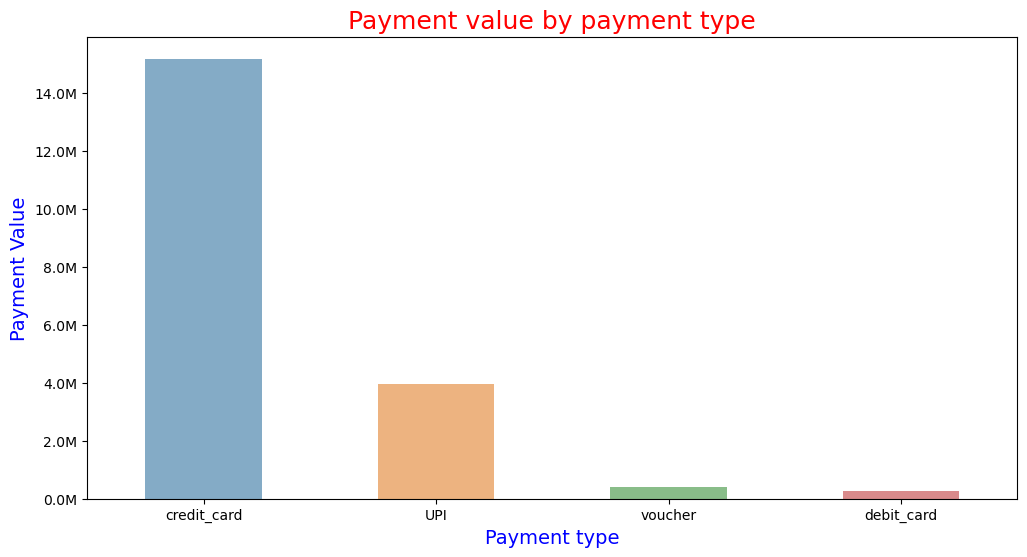

In [222]:
# plot a barchcart
plt.figure(figsize=(12,6))
sns.barplot(data= payment_df,
            x='payment_type',
            y='payment_value',
            alpha=0.6,
            width= 0.5)
plt.xlabel('Payment type', fontsize=14, color='blue')
plt.ylabel('Payment Value',fontsize=14, color='blue')
plt.title('Payment value by payment type', fontsize=18, color='red')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1f}M'.format(y/1e6)))
plt.show()

##### b. Which payment channels are used by most customers.

In [223]:
# group by payment_type and count 'customer_unique_id'
customer_payment_type = order_payment_df.groupby(['payment_type'])['customer_unique_id'].count().reset_index()

# rename column name as 'customer_count' and sort the values 
customer_payment_type.rename(columns={'customer_unique_id':'customer_count'}, inplace=True)
customer_payment_type.sort_values(by='customer_count', ascending=False, inplace=True)

# display the result
customer_payment_type

,payment_type,customer_count
1,credit_card,84895
0,UPI,22347
3,voucher,6123
2,debit_card,1653


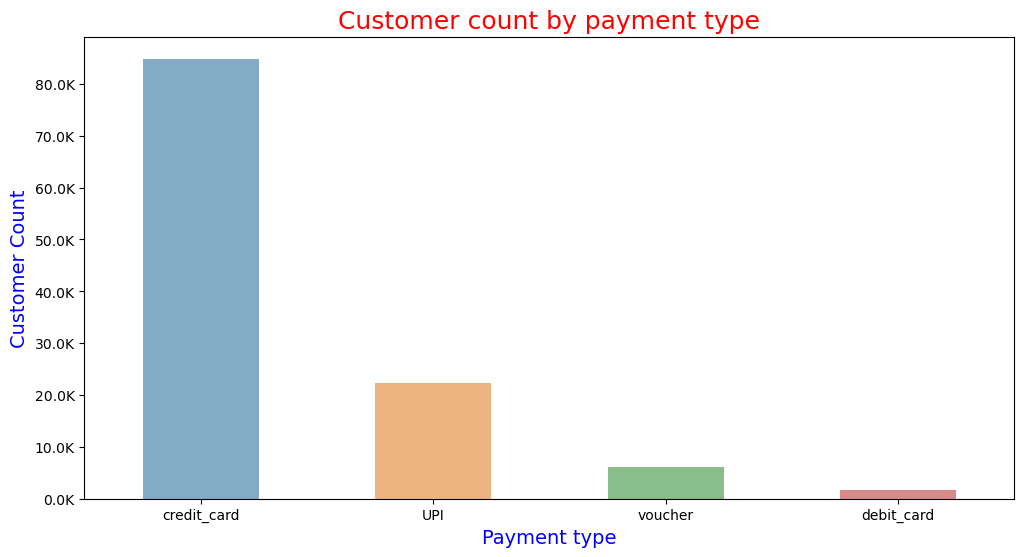

In [224]:
# plot a barchcart
plt.figure(figsize=(12,6))
sns.barplot(data= customer_payment_type,
            x='payment_type',
            y='customer_count',
            alpha=0.6,
            width= 0.5)
plt.xlabel('Payment type', fontsize=14, color='blue')
plt.ylabel('Customer Count',fontsize=14, color='blue')
plt.title('Customer count by payment type', fontsize=18, color='red')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1f}K'.format(y/1e3)))
plt.show()

--------------------------------

#### **5. Customer satisfaction towards category & product**
##### a. Which categories (top 10) are maximum rated & minimum rated?


In [225]:
order_ratings.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:00
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,2018-03-11 03:05:00
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,2018-02-18 14:36:00
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21,2017-04-21 22:02:00
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01,2018-03-02 10:26:00


In [226]:
# join order_rating dataframe to customer_products
customer_product_rating = pd.merge(customer_orders_products, order_ratings, on='order_id', how='inner')

Top 10 maximum rated product category

In [227]:
# group by product category name and calculate average ratings 
product_rating = customer_product_rating.groupby('product_category_name')['review_score'].mean().reset_index()

# sort the customer rating by decreasing order and filter top 10.
top_10 = product_rating.sort_values(by='review_score', ascending=False)[:10]

# display the result
top_10

,product_category_name,review_score
29,Fashion_Childrens_Clothes,5.000000
11,Cds_Dvds_Musicals,4.642857
9,Books_Imported,4.508772
8,Books_General_Interest,4.503731
64,Small_Appliances_Home_Oven_And_Coffee,4.438356
10,Books_Technical,4.381132
37,Food_Drink,4.369004
32,Fashion_Sport,4.366667
22,Costruction_Tools_Tools,4.359223
53,Luggage_Accessories,4.346332


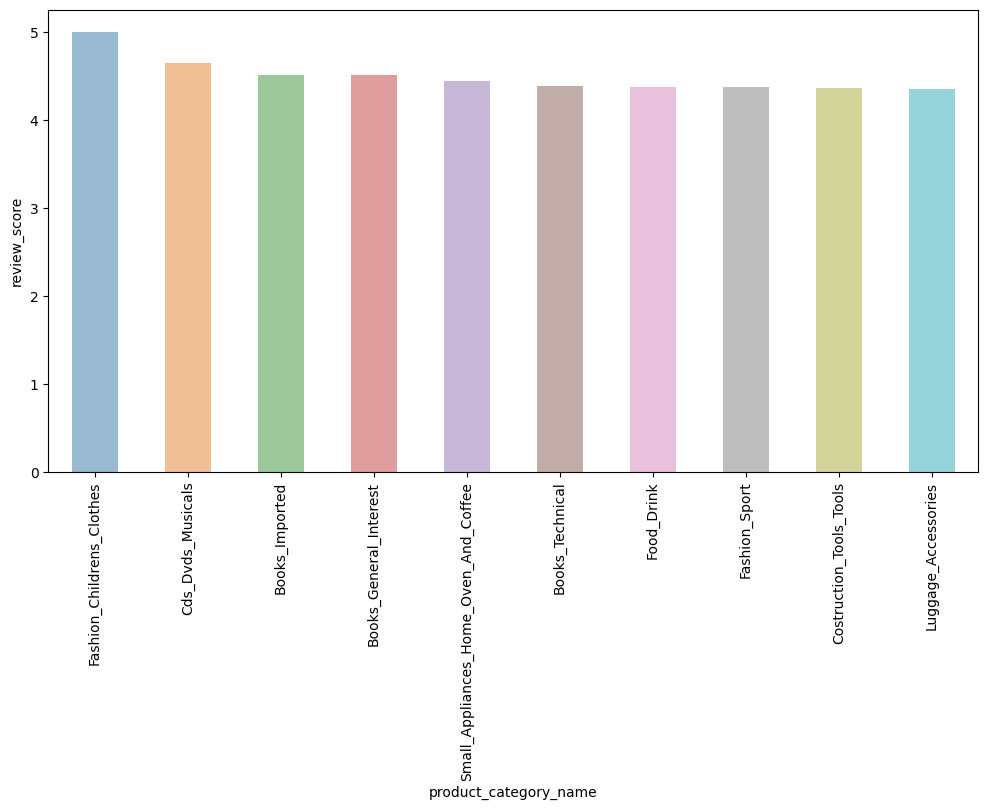

In [228]:
# plot bar graph 
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10, x='product_category_name', y='review_score', alpha=0.5, width=0.5)
plt.xticks(rotation=90)
plt.show()

Top 10 minimum rated products 

In [229]:
# top 10 lowest rated 
minimum_10 = product_rating.sort_values(by='review_score', ascending=True)[:10]

minimum_10

,product_category_name,review_score
61,Security_And_Services,2.500000
46,Home_Comfort_2,3.366667
23,Diapers_And_Hygiene,3.378378
57,Office_Furniture,3.508343
30,Fashion_Male_Clothing,3.736000
34,Fixed_Telephony,3.746094
52,La_Cuisine,3.785714
4,Audio,3.812672
58,Party_Supplies,3.833333
47,Home_Confort,3.847222


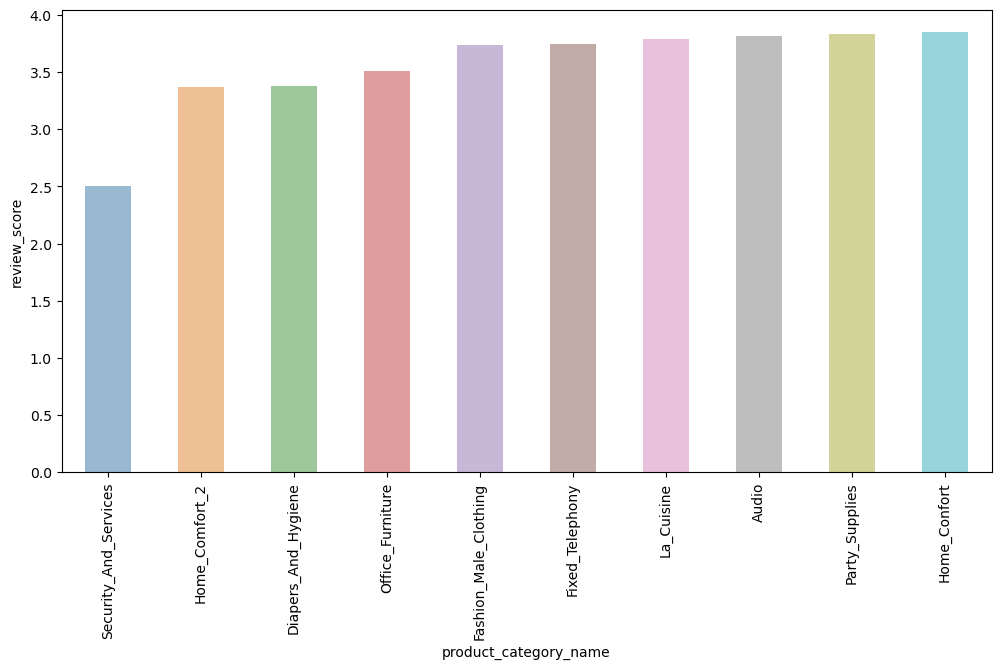

In [230]:
# plot bar graph
plt.figure(figsize=(12, 6))
sns.barplot(data=minimum_10, x='product_category_name', y='review_score', alpha=0.5, width=0.5)
plt.xticks(rotation=90)
plt.show()

#### b. Which products (top10) are maximum rated & minimum rated?

In [231]:
# group by product category name and calculate average ratings 
product_rating = customer_product_rating.groupby('product_id')['review_score'].mean().reset_index()

# sort the customer rating by decreasing order and filter top 10.
top_10 = product_rating.sort_values(by='review_score', ascending=False)[:10]

# display the result
top_10

,product_id,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
11188,59dbefe045e850ce6df6b1fd5dce14ba,5.0
24764,c876dad8e599989a907ee3b09c68966d,5.0
24763,c874b6cca27efc978feed6fd55b2985c,5.0
24762,c8739aab0307635a23981f93dff12a9c,5.0
24760,c86f95986c7050bf988aed62520093e7,5.0
24757,c866cfc3cef7412031f09f918ed2cd90,5.0
24755,c8648fddfafc439c1c9bb5236945b953,5.0
12173,623b4f1591eeb1d9019c79ecccd8ded5,5.0
12174,623ca22610ff4563843c9568e1f9c870,5.0


In [232]:
# minimum rated
minimum_rated = product_rating.sort_values(by='review_score', ascending=True)[:10]

# display the result
minimum_rated

,product_id,review_score
23421,be03d93320192443b8fa24c0ca6ead98,1.0
1769,0e2c6b2fc22b192f824a68a0fa537aa0,1.0
22275,b4f435100a515fb999f800065c3424a2,1.0
5208,291c7fc5097e83062a4377ca30c6b834,1.0
28310,e53588854973a383ff66d64f0fee88a9,1.0
5205,291b39691d7d40a42f9e7d0920d9a21a,1.0
5204,2918336685cacbe8df9a66e4cad34cf1,1.0
1777,0e35a413d832e63c5d46101b7c88de0f,1.0
28301,e527af42fb2b8d253e47fdb6e7af7db9,1.0
22286,b512f3c014a02179181951e048ed73cb,1.0


#### c. Average rating by State, seller, product category, month etc.

##### Average rating by State

In [233]:
# group by customer state and take the mean of review score
rating_state= customer_product_rating.groupby('customer_state')['review_score'].mean().reset_index()
rating_state.rename(columns={'review_score':'average_rating'}, inplace=True)
# display average customer review by state by descending order

rating_state.sort_values(by='average_rating', ascending=False, inplace=True) 
rating_state.reset_index(drop=True)

,customer_state,average_rating
0,Goa,4.800000
1,Punjab,4.186813
2,Uttar Pradesh,4.175518
3,Tamil Nadu,4.148955
4,Haryana,4.143855
5,Orissa,4.134848
6,Rajasthan,4.129693
7,Maharashtra,4.114416
8,Kerala,4.091291
9,Gujarat,4.085503


##### Average rating by Seller

In [234]:
# group by seller_id and take the mean of review_score
seller_rating = customer_product_rating.groupby('seller_id')['review_score'].mean().reset_index()
seller_rating.rename(columns={'review_score':'average_rating'}, inplace=True)
# display average customer review by state by descending order
seller_rating.sort_values(by='average_rating', ascending=False, inplace=True) 
# top 10 sellers with highest average ratings
seller_rating.reset_index(drop=True)[:10]

,seller_id,average_rating
0,661ad5fcc28cdfb8bcadb12bb2272475,5.0
1,a81466620e46a6970b22ef40379fdfc9,5.0
2,a9b533a26e898b12e8b8d4c07279bf4d,5.0
3,270572bb714b00531be85e16e1550f26,5.0
4,a9ae440659f48b7849df83e82734150b,5.0
5,a99504ac23ed125aaf5302af6cc30af9,5.0
6,a9415cf907dfa12f9ed18693244f5329,5.0
7,a89e143d5211473ae18db9577ee34b64,5.0
8,7f02656561b680def9986c0795a8a080,5.0
9,a7ecf689b40a44361e259b28939023e4,5.0


#### Average rating by month

In [235]:
# group by seller_id and take the mean of review_score
month_rating = customer_product_rating.groupby('Order_Month')['review_score'].mean().reset_index()
month_rating['Order_Month'] = month_rating['Order_Month'].dt.strftime('%Y-%B')
month_rating.rename(columns={'review_score':'average_rating'}, inplace=True)
# display average customer review by state by descending order
month_rating.sort_values(by='average_rating', ascending=False, inplace=True) 
# top 10 sellers with highest average ratings
month_rating.reset_index(drop=True)

,Order_Month,average_rating
0,2016-December,5.000000
1,2018-July,4.263827
2,2017-August,4.253769
3,2018-August,4.240011
4,2018-June,4.202718
5,2017-May,4.186599
6,2017-June,4.180716
7,2017-February,4.174348
8,2017-September,4.173941
9,2017-July,4.170416
